# Time Series Analysis

In [1]:
import numpy as np
import pandas as pd

dat = pd.read_csv('Foreign_Exchange_Rates.csv')
dat.drop('Unnamed: 0', axis = 1, inplace = True)

In [2]:
# Data Cleaning

dat.columns = [i.split('-')[0].strip() for i in dat.columns] # Renaming columns 
dat['Time Serie'] = pd.to_datetime(dat['Time Serie']) # Converting date column to date type
dat.rename(columns = {'Time Serie':'Time_series'},inplace = True)
dat.replace('ND', np.nan, inplace = True) # Taking care of this string value typo in data
dat.dropna(inplace = True) # Dropping Nans
dat0 = dat.copy()
dat.set_index('Time_series', inplace = True) # Set the date column as index
dat0.head()

,Time_series,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [3]:
dat.head()

,AUSTRALIA,EURO AREA,NEW ZEALAND,UNITED KINGDOM,BRAZIL,CANADA,CHINA,HONG KONG,INDIA,KOREA,...,SINGAPORE,DENMARK,JAPAN,MALAYSIA,NORWAY,SWEDEN,SRI LANKA,SWITZERLAND,TAIWAN,THAILAND
Time_series,,,,,,,,,,,,,,,,,,,,,
2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
for col in dat.columns:
    dat[col] = dat[col].astype('float')
    dat[col+'_pctchg'] = dat[col].pct_change()
    dat0[col] = dat0[col].astype('float')
    dat0[col] = np.log(dat0[col]/dat0.loc[0,col])

Text(0.5, 1.0, 'India_Fx rate')

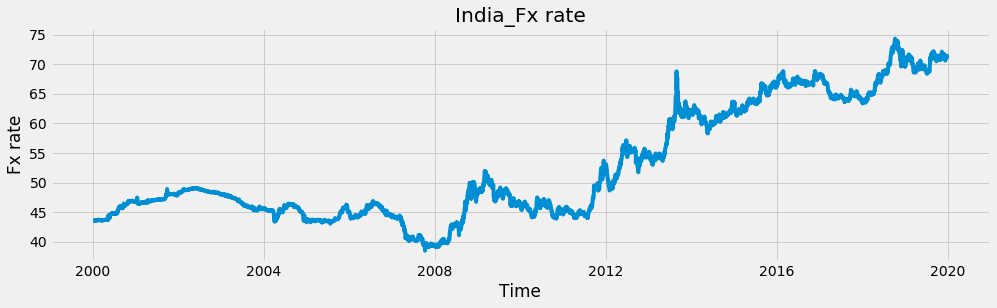

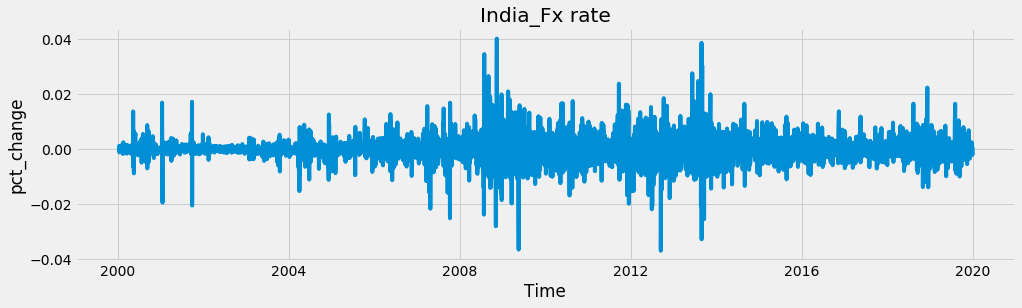

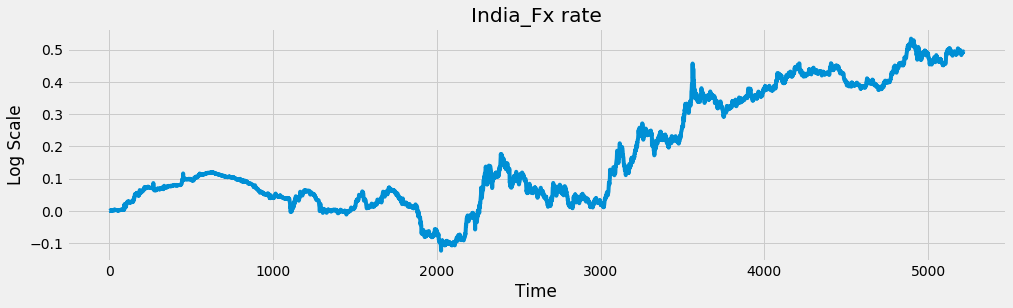

In [6]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize = (15,4))
plt.plot(dat['INDIA'])
plt.xlabel('Time')
plt.ylabel('Fx rate')
plt.title('India_Fx rate')

plt.figure(figsize = (15,4))
plt.plot(dat['INDIA_pctchg'])
plt.xlabel('Time')
plt.ylabel('pct_change')
plt.title('India_Fx rate')


plt.figure(figsize = (15,4))
plt.plot(dat0['INDIA'])
plt.xlabel('Time')
plt.ylabel('Log Scale')
plt.title('India_Fx rate')

Text(0.5, 1.0, 'HP Filter cycle')

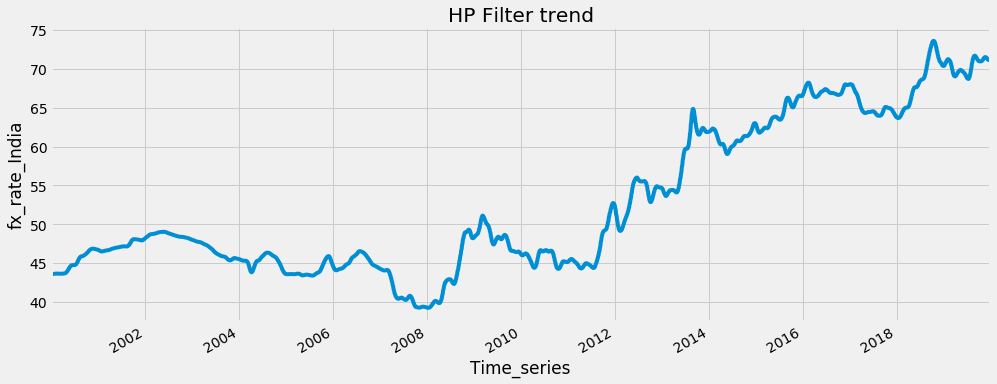

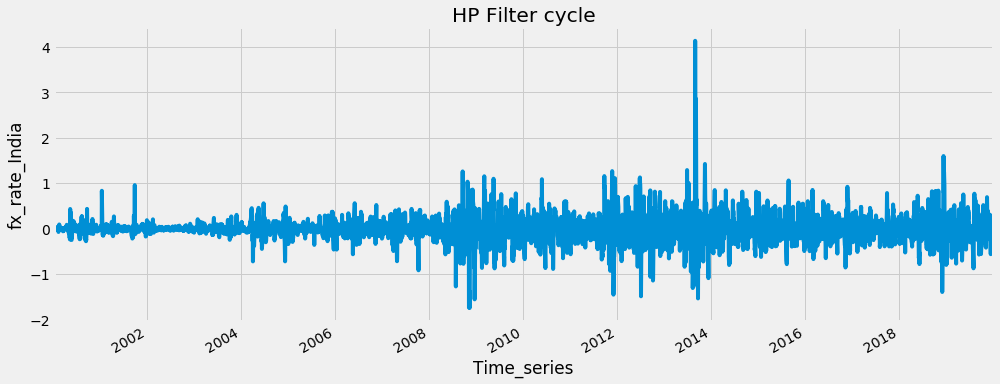

In [7]:
import pandas as pd
from statsmodels.tsa.filters.hp_filter import hpfilter

ifx_cycle, ifx_trend = hpfilter(dat['INDIA'])

ifx_trend.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)
plt.ylabel('fx_rate_India')
plt.title('HP Filter trend')

plt.figure()
ifx_cycle.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)
plt.ylabel('fx_rate_India')
plt.title('HP Filter cycle')

#### Detrending a TimeSeries

Detrending is the process of removing a trend from time-series data, or it mentions a change in the mean over time. It is continuously increasing or decreasing over the duration of time. Identification, modeling, and even removing trend data from time-series datasets can be beneficial. The following are methods to detrend time-series data:

1. Pandas differencing
2. SciPy signal
3. HP filter

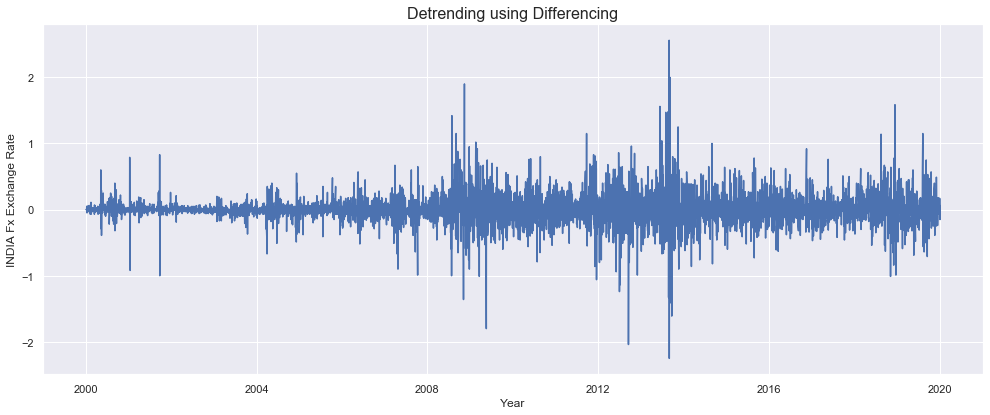

In [8]:
# Pandas Differencing

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load dataset 
# we will use dataset df used in the previous section

diff = dat['INDIA'].diff()

plt.figure(figsize = (15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('INDIA Fx Exchange Rate')
plt.show()


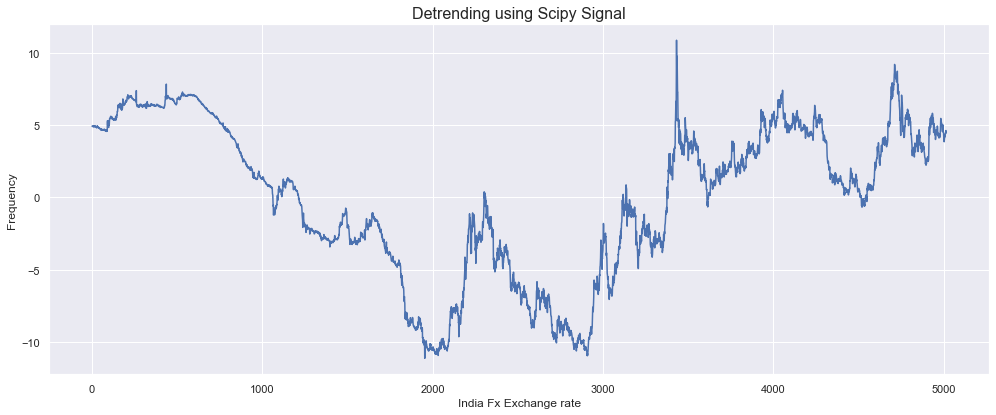

In [9]:
# Scipy Signal # Removing the Linear Trend

from scipy import signal

detrend_scipy = signal.detrend(dat['INDIA'])

plt.figure(figsize = (15,6))
plt.plot(detrend_scipy)
plt.title('Detrending using Scipy Signal', fontsize = 16)
plt.xlabel('India Fx Exchange rate')
plt.ylabel('Frequency')
plt.show()

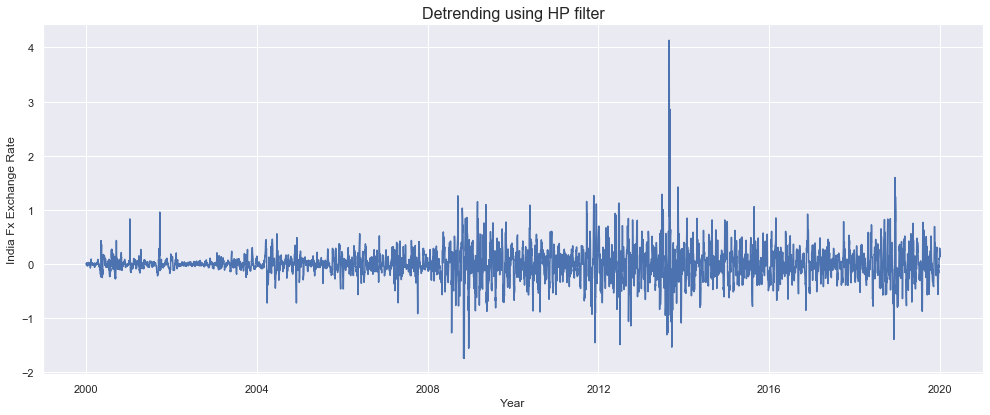

In [10]:
# HP Filter from stats models
# An HP filter is also used to detrend a time series and smooth the data. 
# It’s used for removing short-term fluctuations.

dat['hp_trend'] = ifx_trend
detrended_hp = dat['INDIA'] - dat['hp_trend']

plt.figure(figsize = (15,6))
plt.plot(detrended_hp)
plt.title('Detrending using HP filter', fontsize = 16)
plt.xlabel('Year')
plt.ylabel('India Fx Exchange Rate')
plt.show()

### Seasonality

Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data. 

The following methods can be used to detect seasonality:
1. Multiple box plots
2. Autocorrelation plots

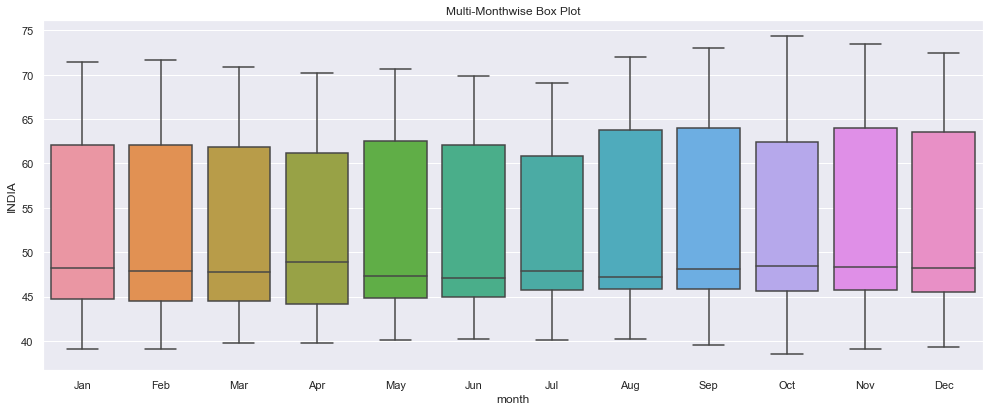

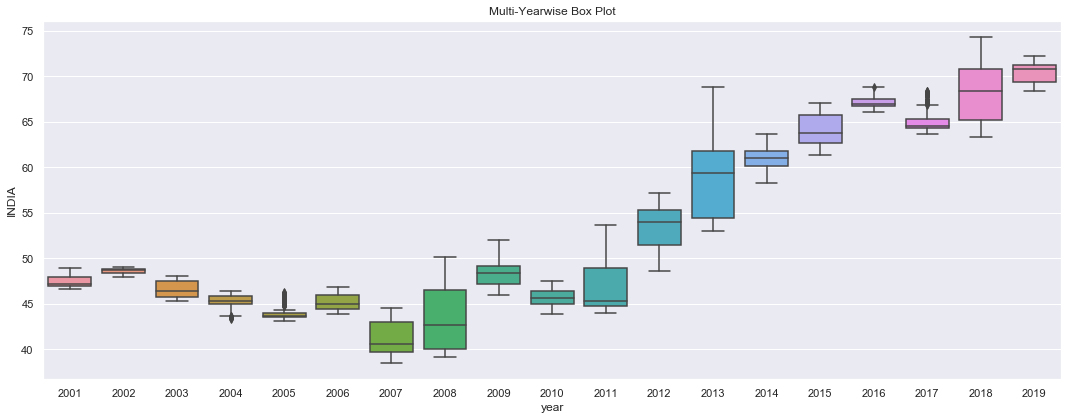

In [11]:
# Multiple box plots
# A box plot is an essential graph to depict data spread out over a range. 
# It is a standard approach to showing the minimum, first quartile, middle, third quartile, and maximum.

dat['month'] = [d.strftime('%b') for d in dat.index]
dat['year'] = [d.year for d in dat.index]

plt.figure(figsize = (15,6))
sns.boxplot( x= 'month', y = 'INDIA', data = dat).set_title("Multi-Monthwise Box Plot")
plt.show()

plt.figure(figsize = (15,6))
sns.boxplot( x= 'year', y = 'INDIA', data = dat[300:]).set_title("Multi-Yearwise Box Plot")
plt.tight_layout()
plt.show()


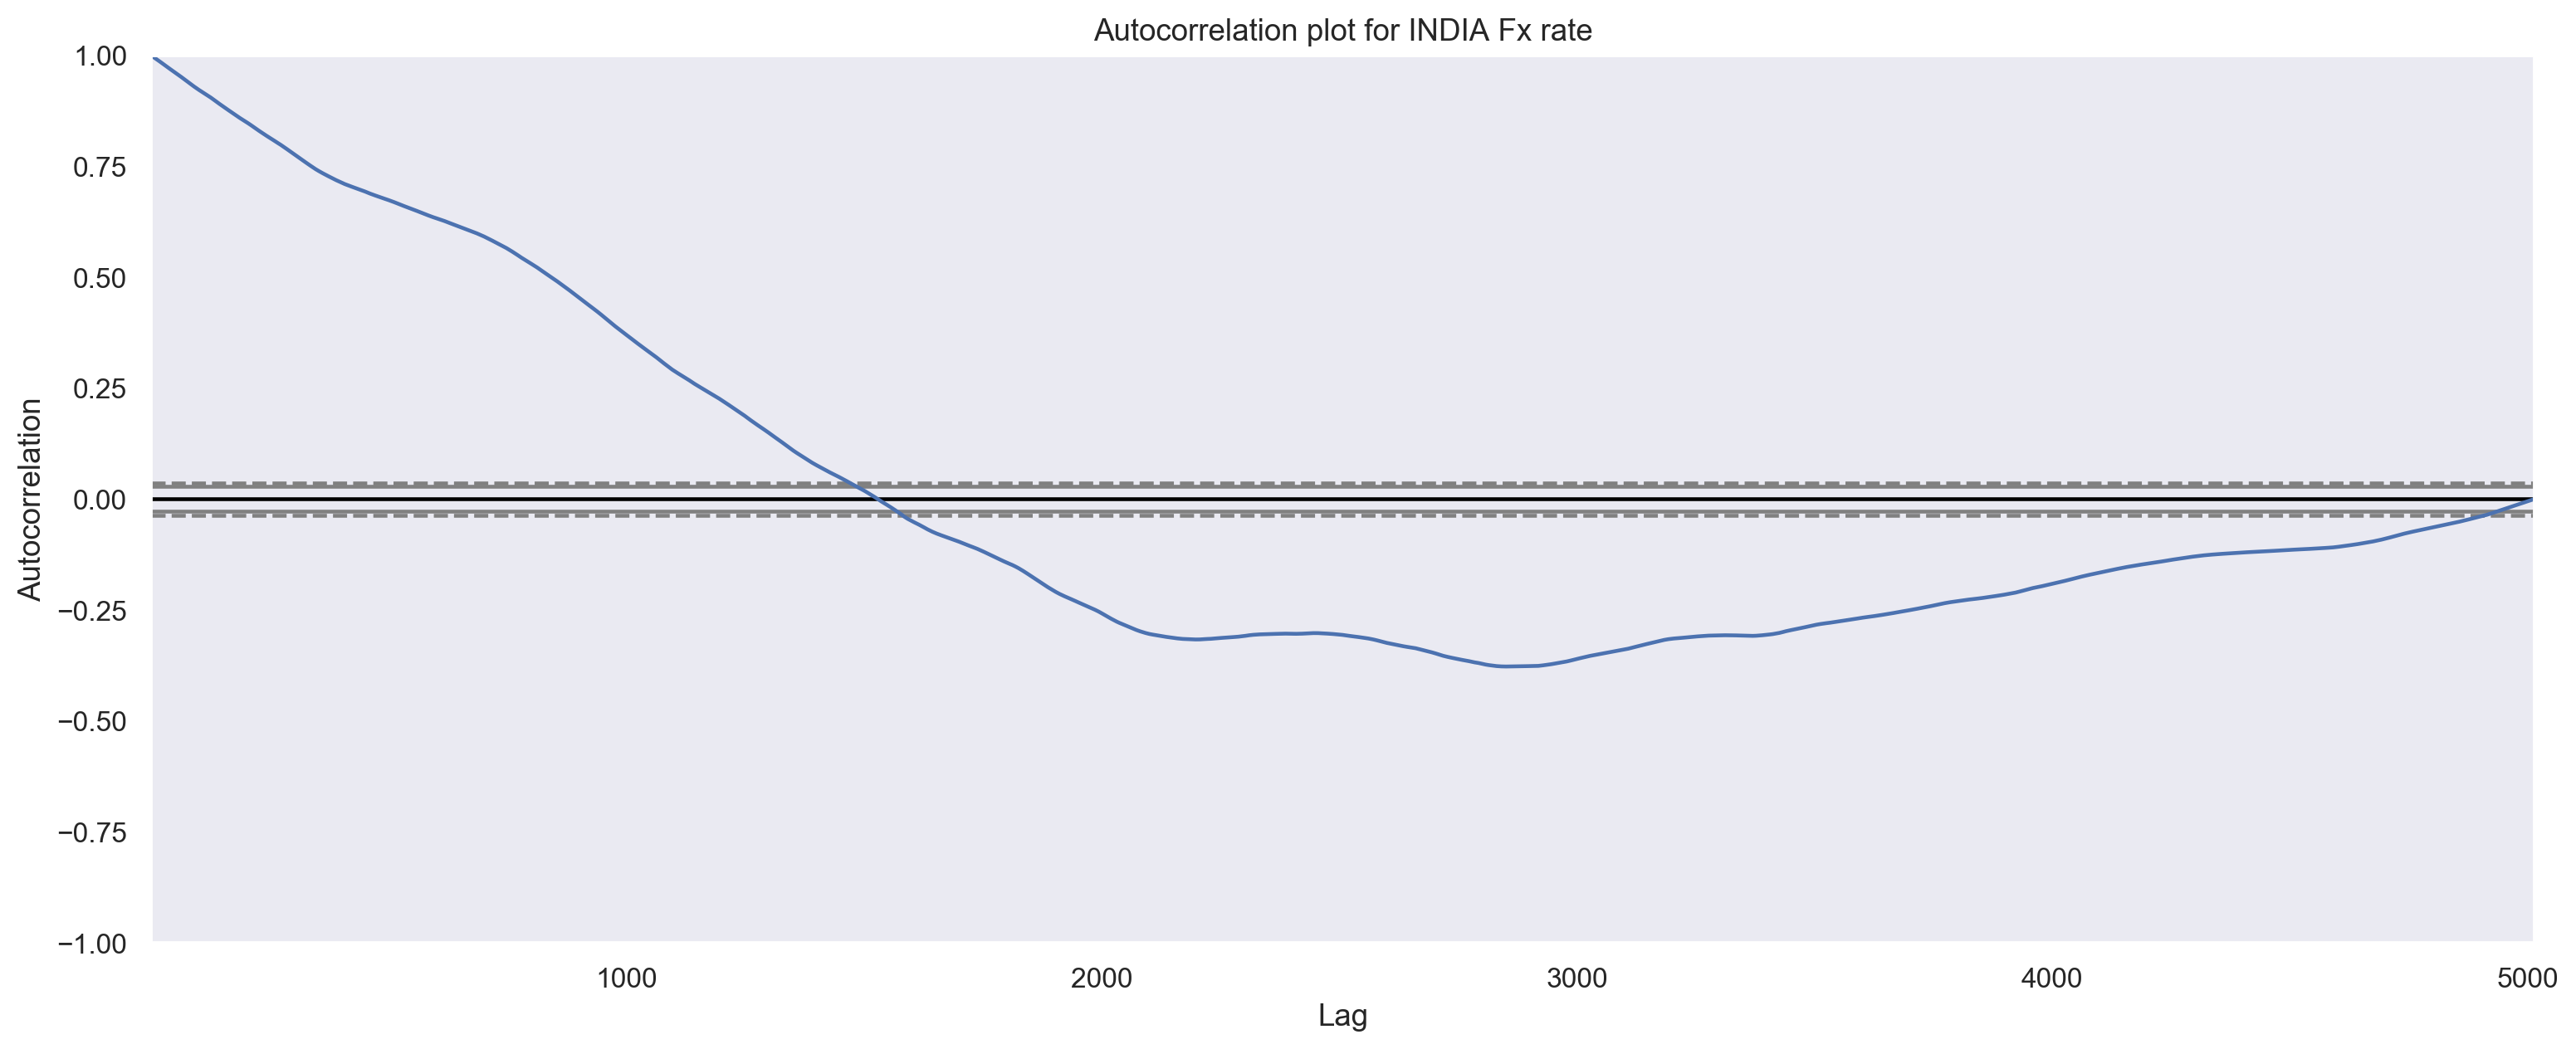

In [12]:
# AutoCorrelation Plots
# Autocorrelation is used to check randomness in data. 
# It helps to identify types of data where the period is not known. 
# For instance, for the monthly data, if there is a regular seasonal effect, 
# we would hope to see massive peak lags after every 12 months

from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(dat['INDIA'])
plt.title('Autocorrelation plot for INDIA Fx rate')
plt.show()


#### Deseasoning  of Time Series of Data

Deseasoning means to remove seasonality from time-series data. It is stripped of the pattern of seasonal effect to deseasonalize the impact. 

Decomposition is the process of understanding generalizations and problems related to time-series forecasting. We can leverage seasonal decomposition to remove seasonality from data and check the data only with the trend, cyclic, and irregular variations. 

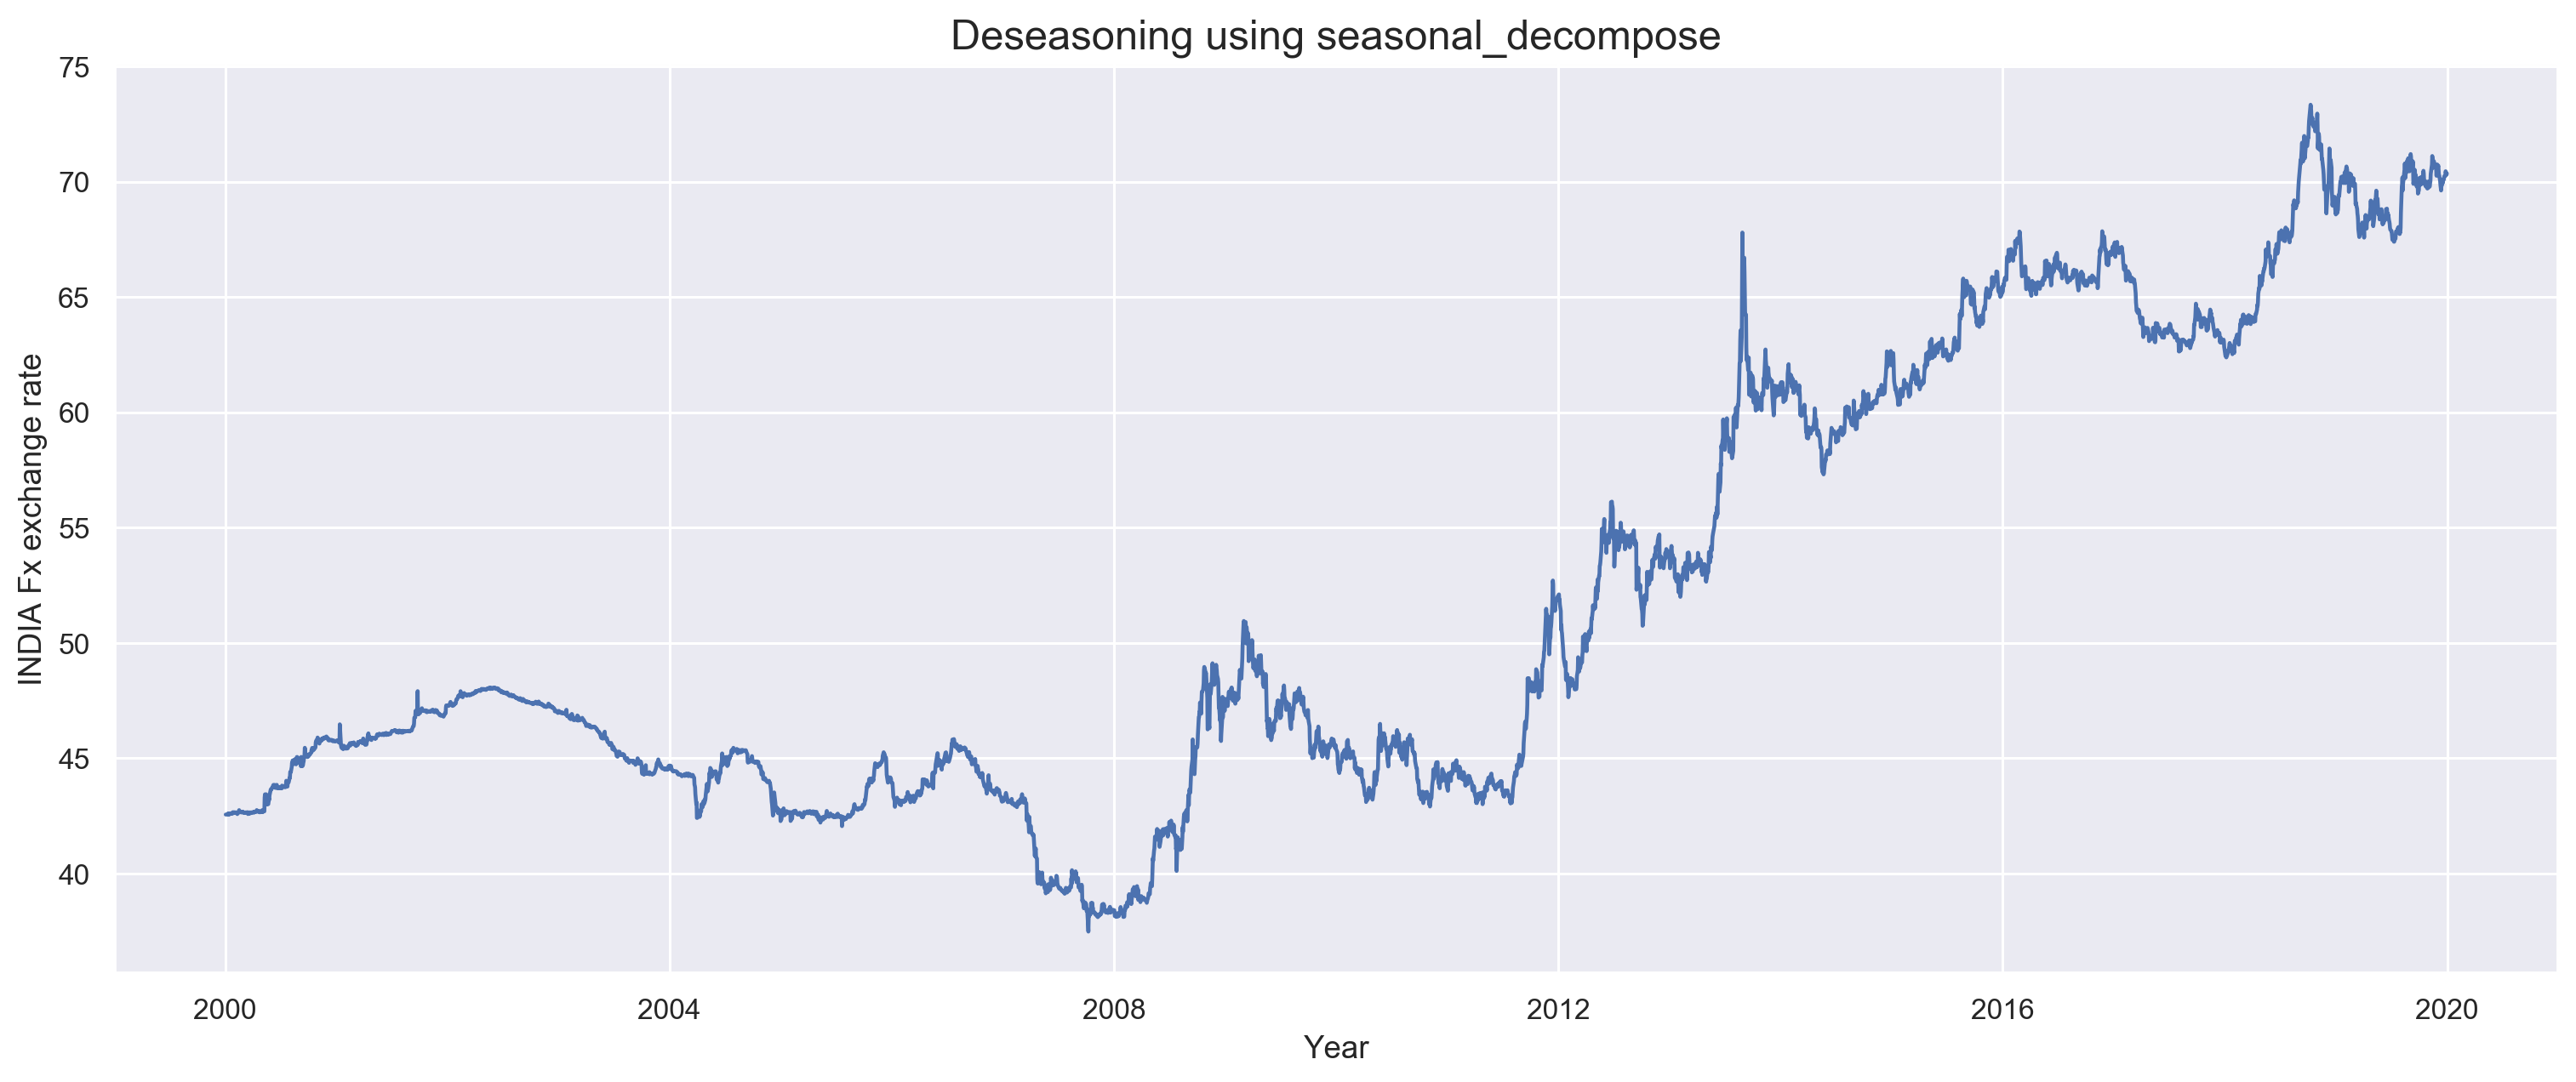

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dat['INDIA'], model = 'multiplicative', extrapolate_trend = 'freq',period = 365)
deseason = dat['INDIA'] - result.seasonal

plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('INDIA Fx exchange rate')
plt.show()

### Cyclic Variations

Cyclical components are fluctuations around a long trend observed every few units of time; this behavior is less frequent compared to seasonality. It is a recurrent process in a time series. In the field of business/economics, the following are three distinct types of cyclic variations examples:

Prosperity: As we know, when organizations prosper, prices go up, but the benefits also increase. On the other hand, prosperity also causes over-development, challenges in transportation, increments in wage rate, insufficiency in labor, high rates of returns, deficiency of cash in the market and price concessions, etc., leading to depression

Depression: As we know, when there is cynicism in exchange and enterprises, processing plants close down, organizations fall flat, joblessness spreads, and the wages and costs are low.


Accessibility: This causes idealness of money, accessibility of cash at a low interest, an increase in demand for goods or money at a low interest rate, an increase in popular merchandise and ventures described by the circumstance of recuperation that at last prompts for prosperity or boom.

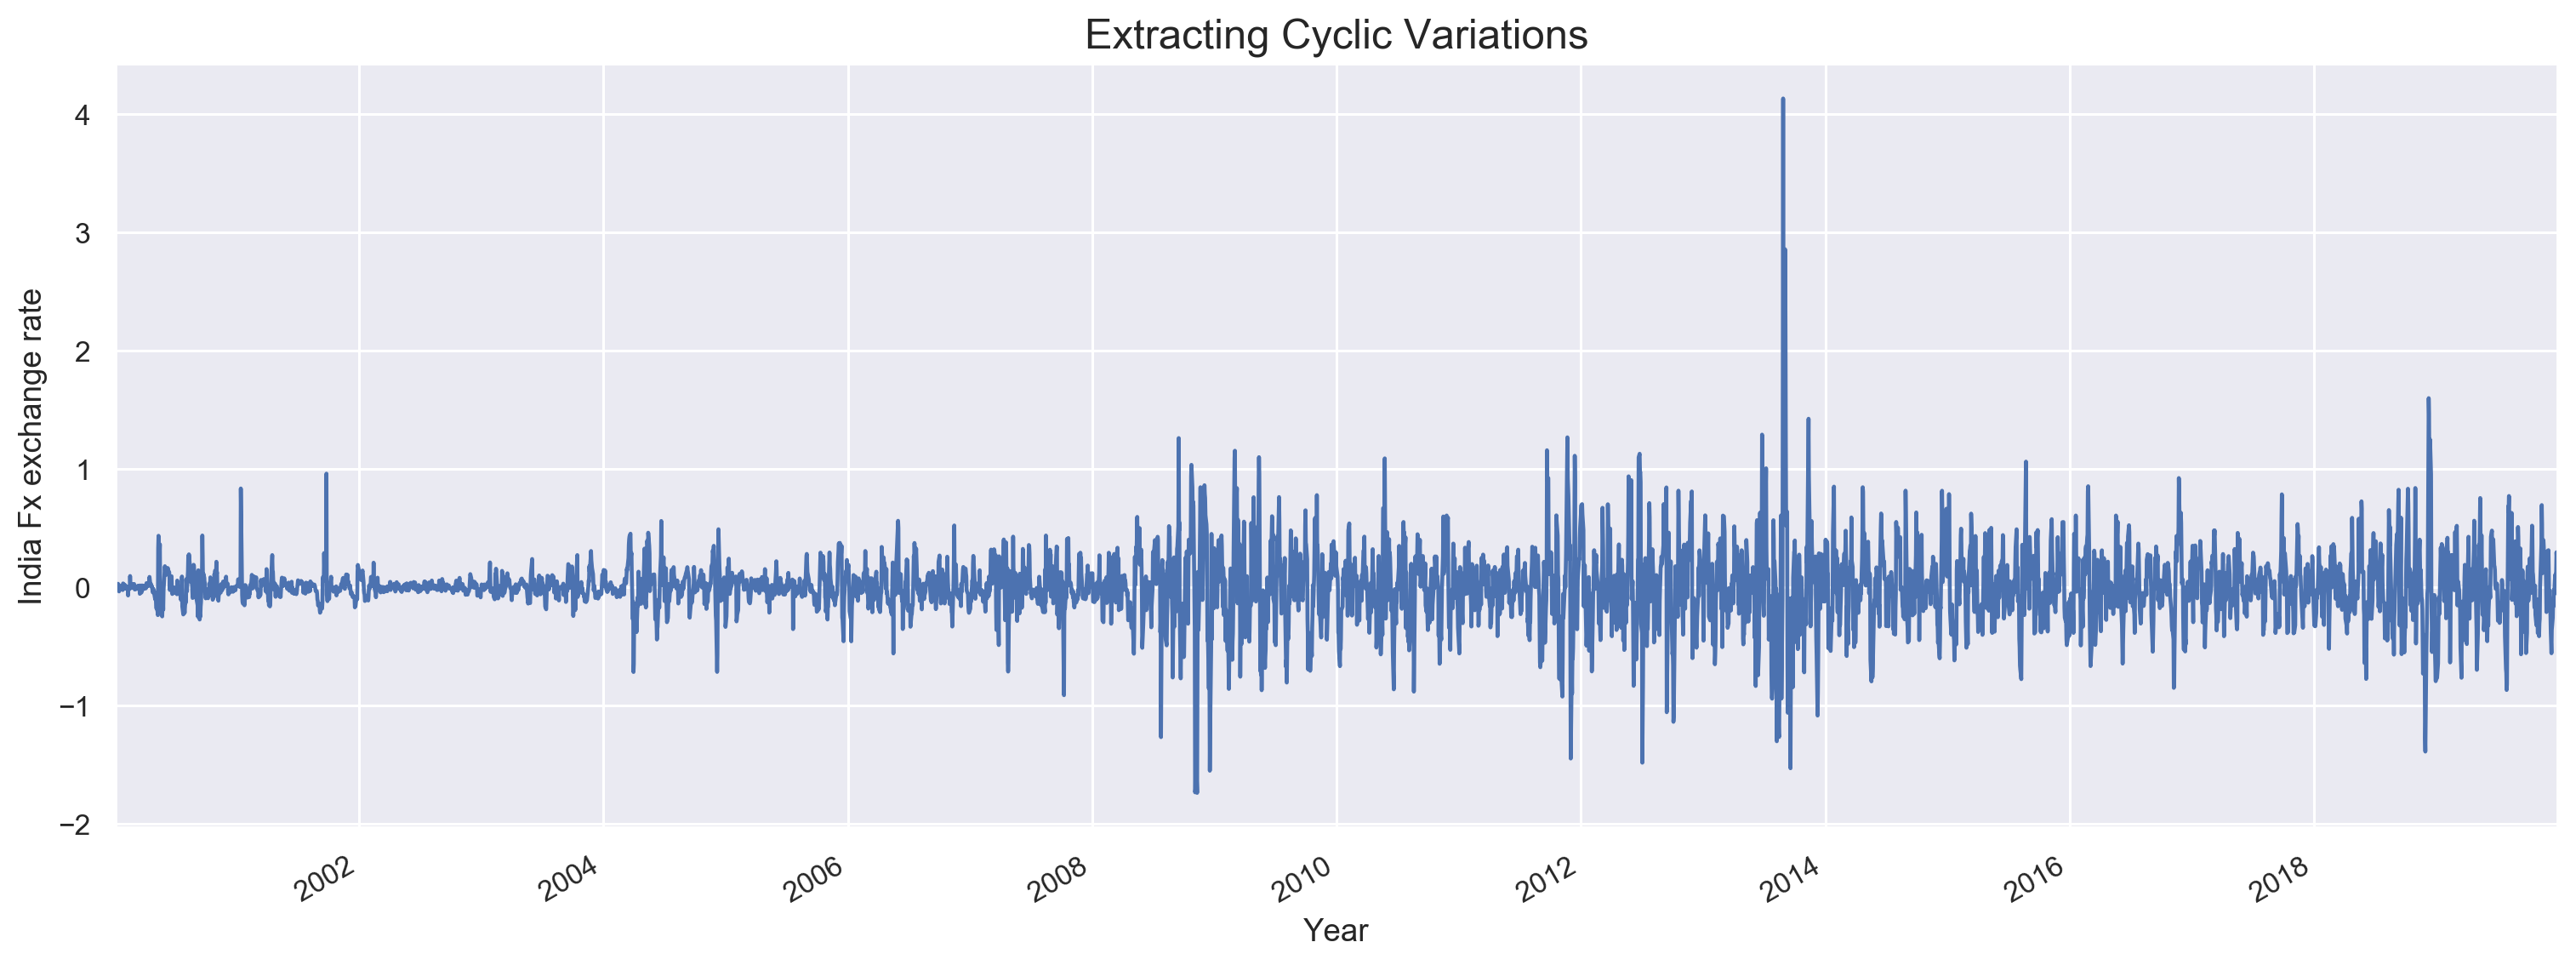

In [14]:
ifx_cycle, ifx_trend = hpfilter(dat['INDIA'], lamb = 1600)
ifx_cycle.plot(figsize = (15,6)).autoscale(axis = 'x',tight = True)

plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('India Fx exchange rate')
plt.show()

### Errors, Unexpected variations, Residuals

When trend and cyclical variations are removed from time-series data, the patterns left behind that cannot be explained are called errors, unexpected variations, or residuals. Various methods are available to check for irregular variations such as probability theory, moving averages, and autoregressive time-series methods. If we can find any cyclic variation in data, it is considered to be part of the residuals. These variations that occur due to unexpected circumstances are called unexpected variations or unpredictable errors.

## Decomposition of Timeseries into its Components

Decomposition is a method used to isolate the time-series data into different elements such as trends, seasonality, cyclic variance, and residuals. We can leverage seasonal decomposition from a stats model to decompose the data into its constituent parts, considering series as additive or multiplicative. An additive model is when time-series data combines these four components for linear trend and seasonality, and a multiplicative model is when components are multiplied to gather for nonlinear trends and seasonality.

1. Trends(T(t)) means an increase or decrease in the value of ts data.

2. Seasonality(S[t]) means repeating a short-term cycle of ts data.

3. Cyclic variations(c[t]) means a fluctuation in long trends of ts data.

4. Residuals(e[t]) means an irregular variation of ts data.

The additive model works with linear trends of time-series data such as changes constantly over time. The additive model formula is as follows:

Y[t] = T[t] + S[t] + c[t] + e[t]

The multiplicative model works with a nonlinear type of data such as quadric or exponential. The multiplicative model formula is as follows:

Y[t] = T[t] * S[t] * c[t] * e[t]



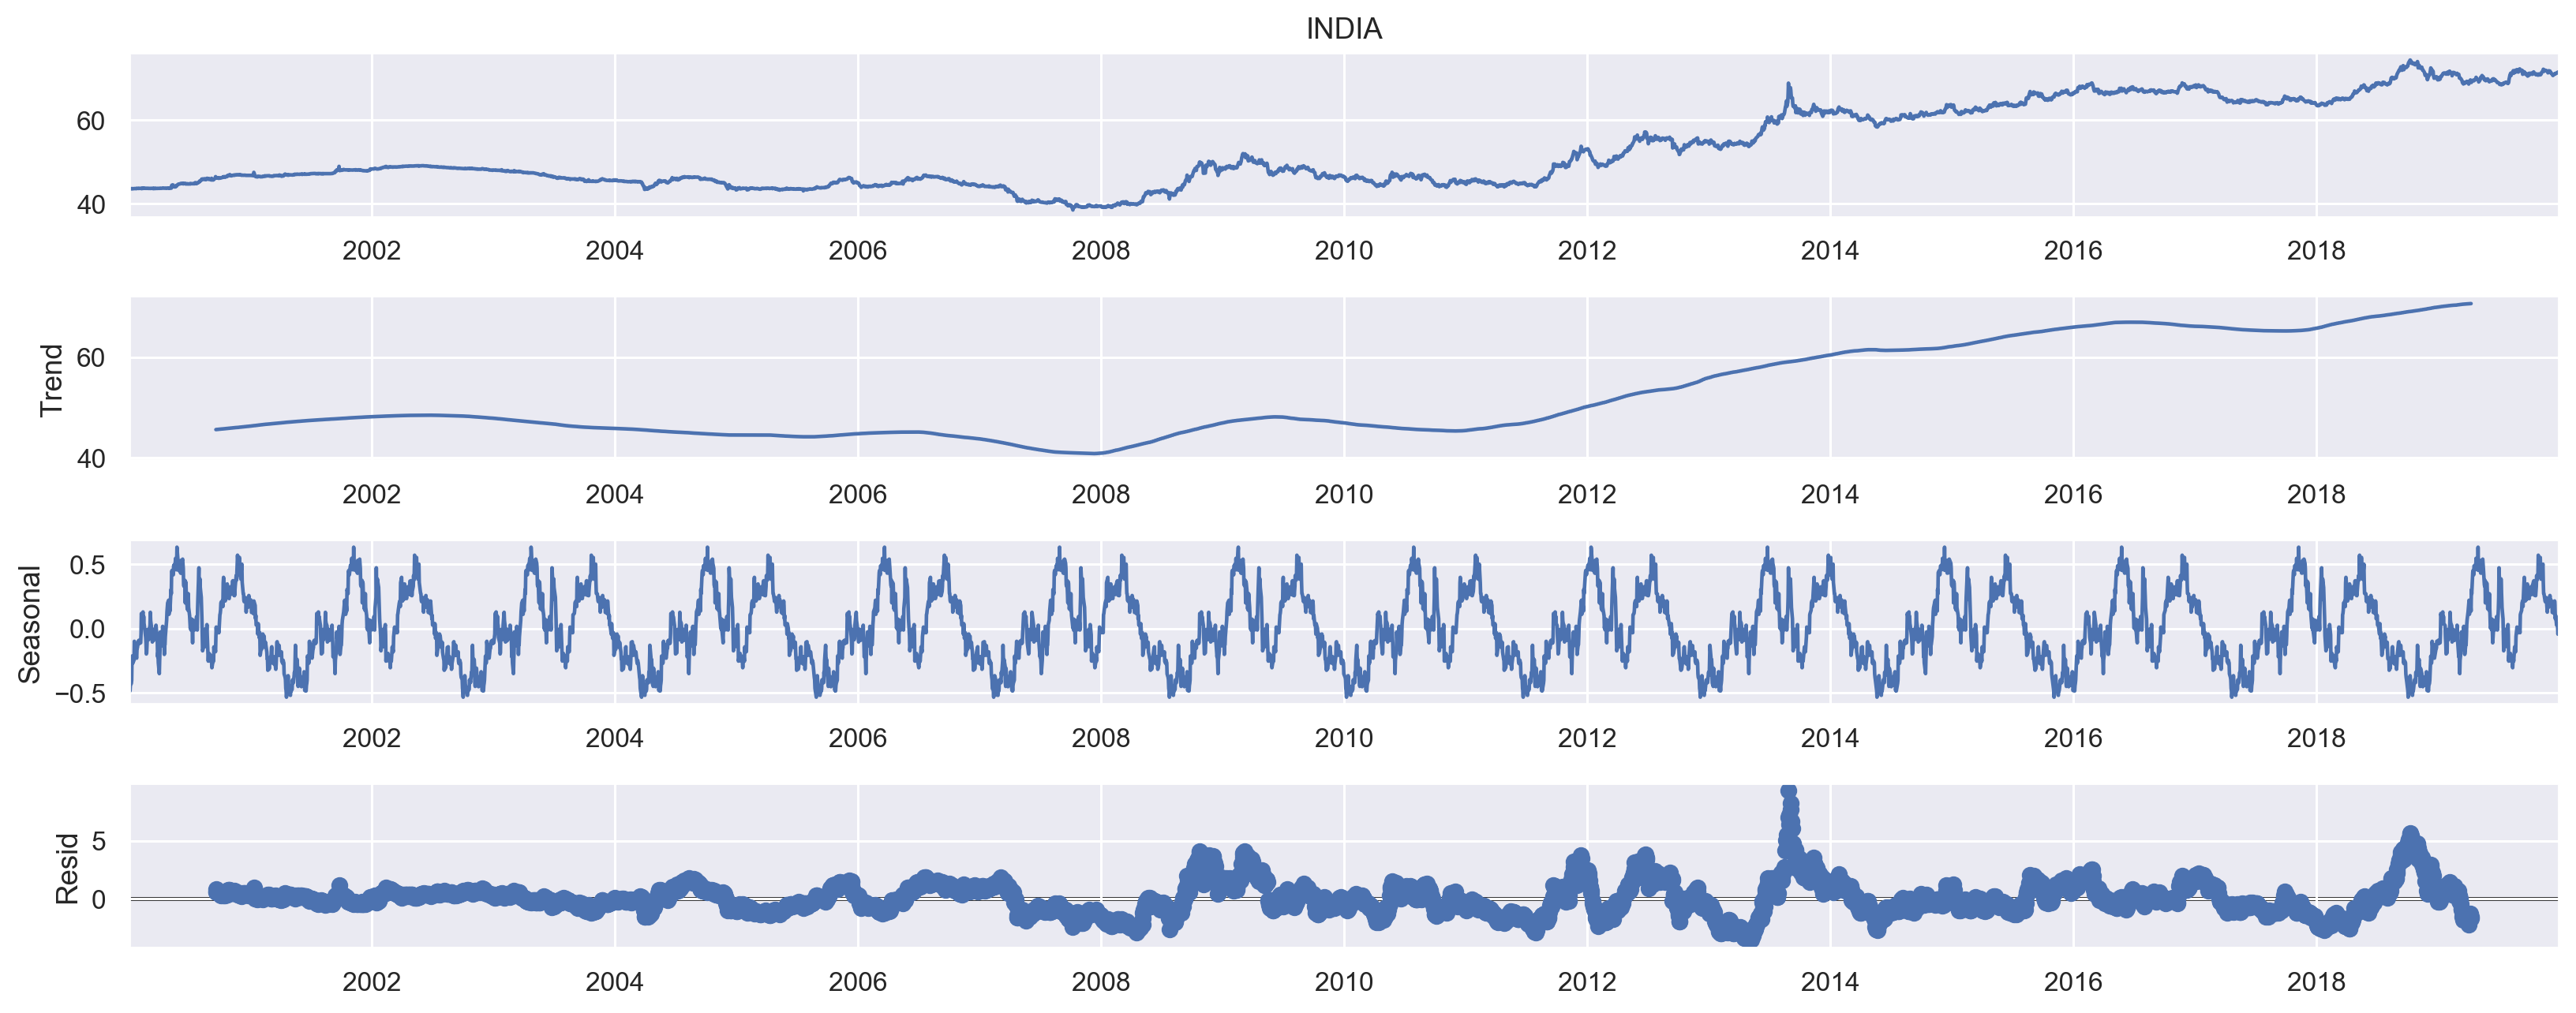

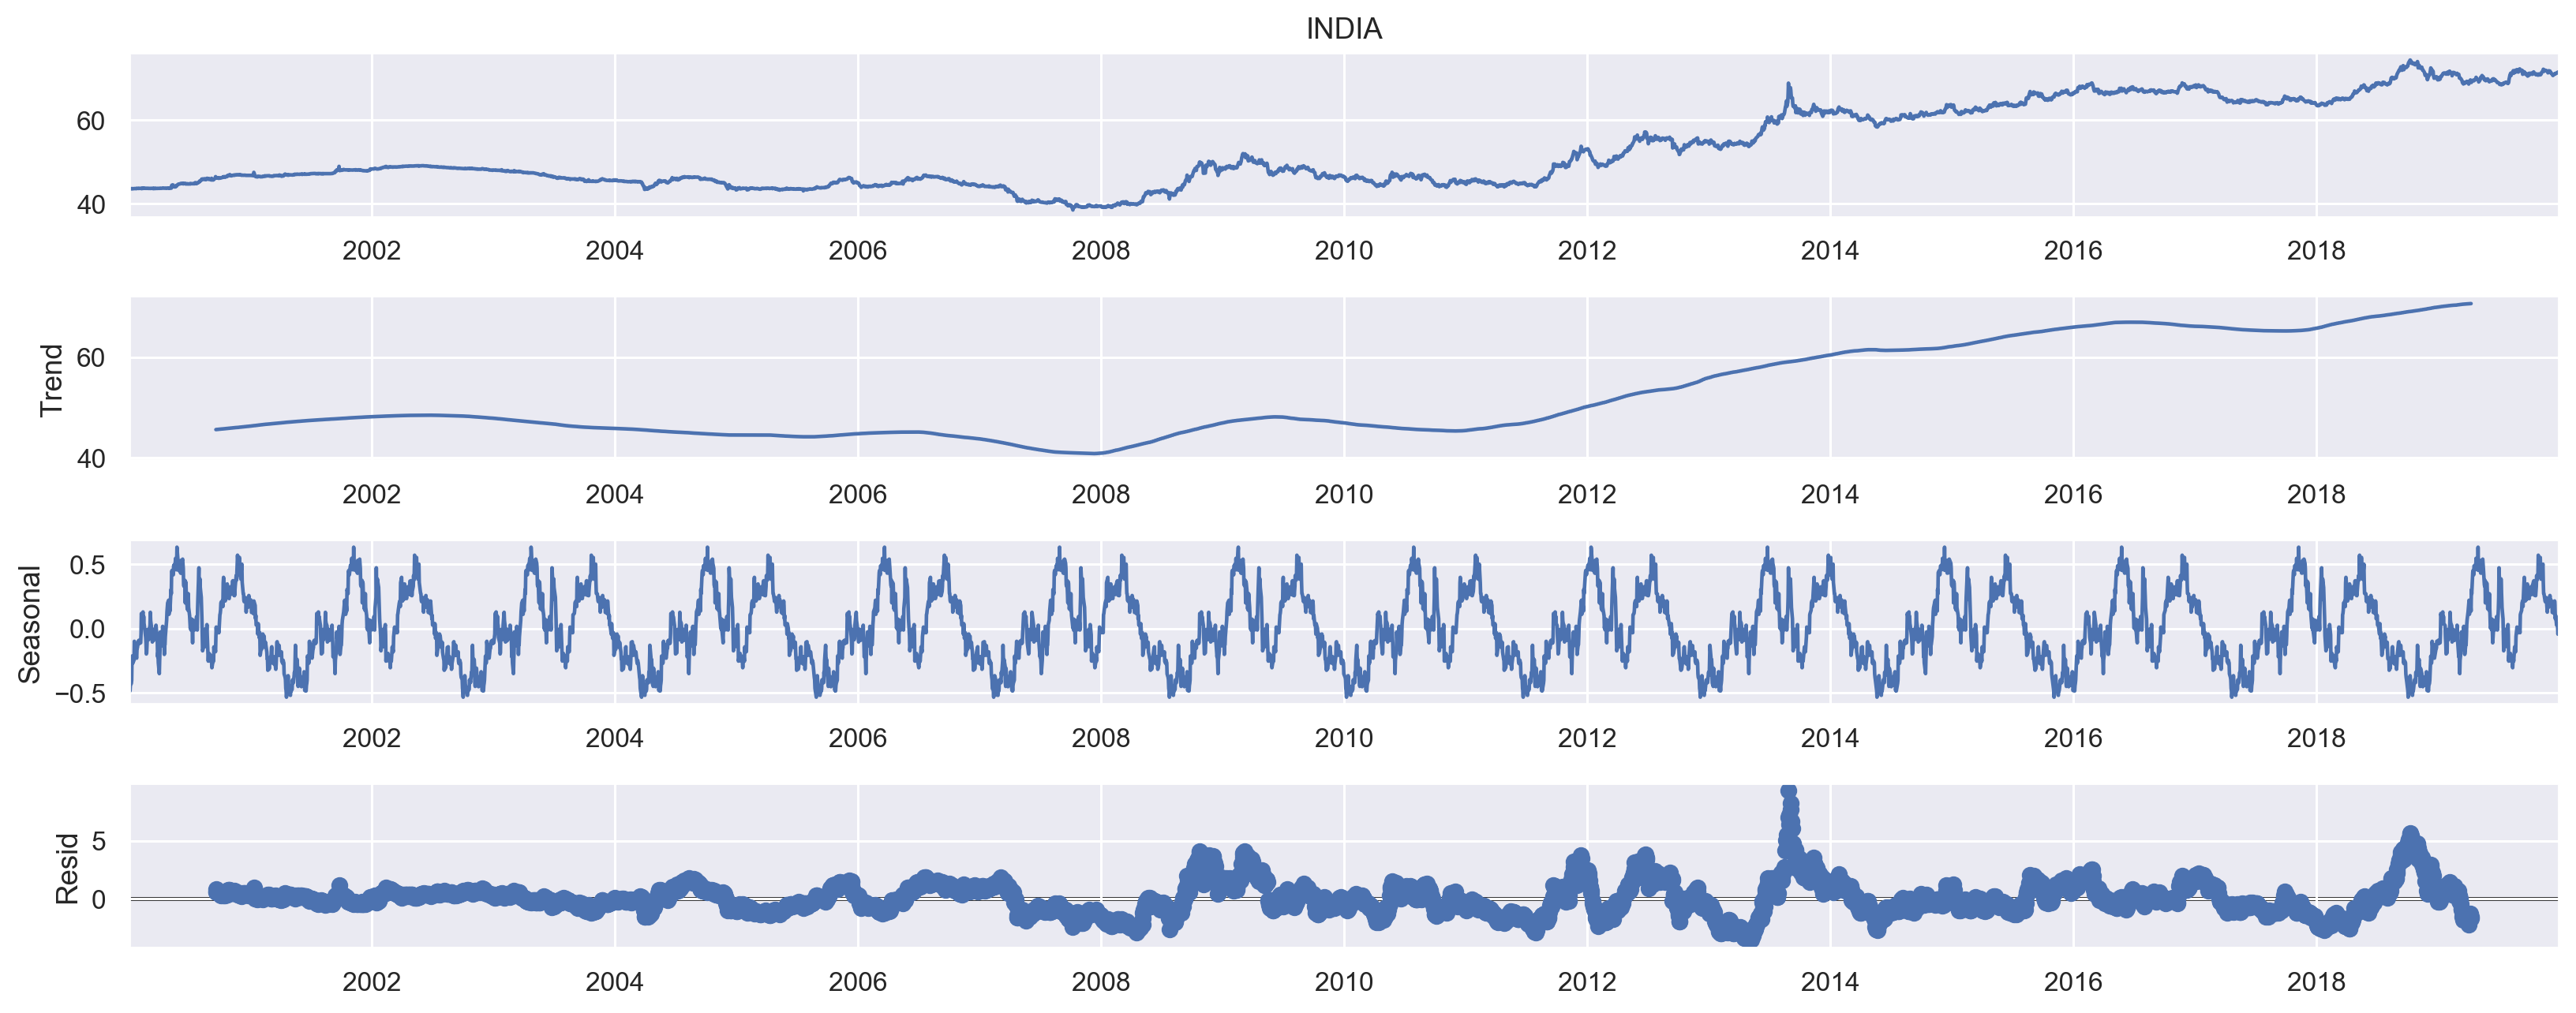

In [15]:
# Additive

result = seasonal_decompose(dat['INDIA'], model = "add",period = 365)
result.plot()

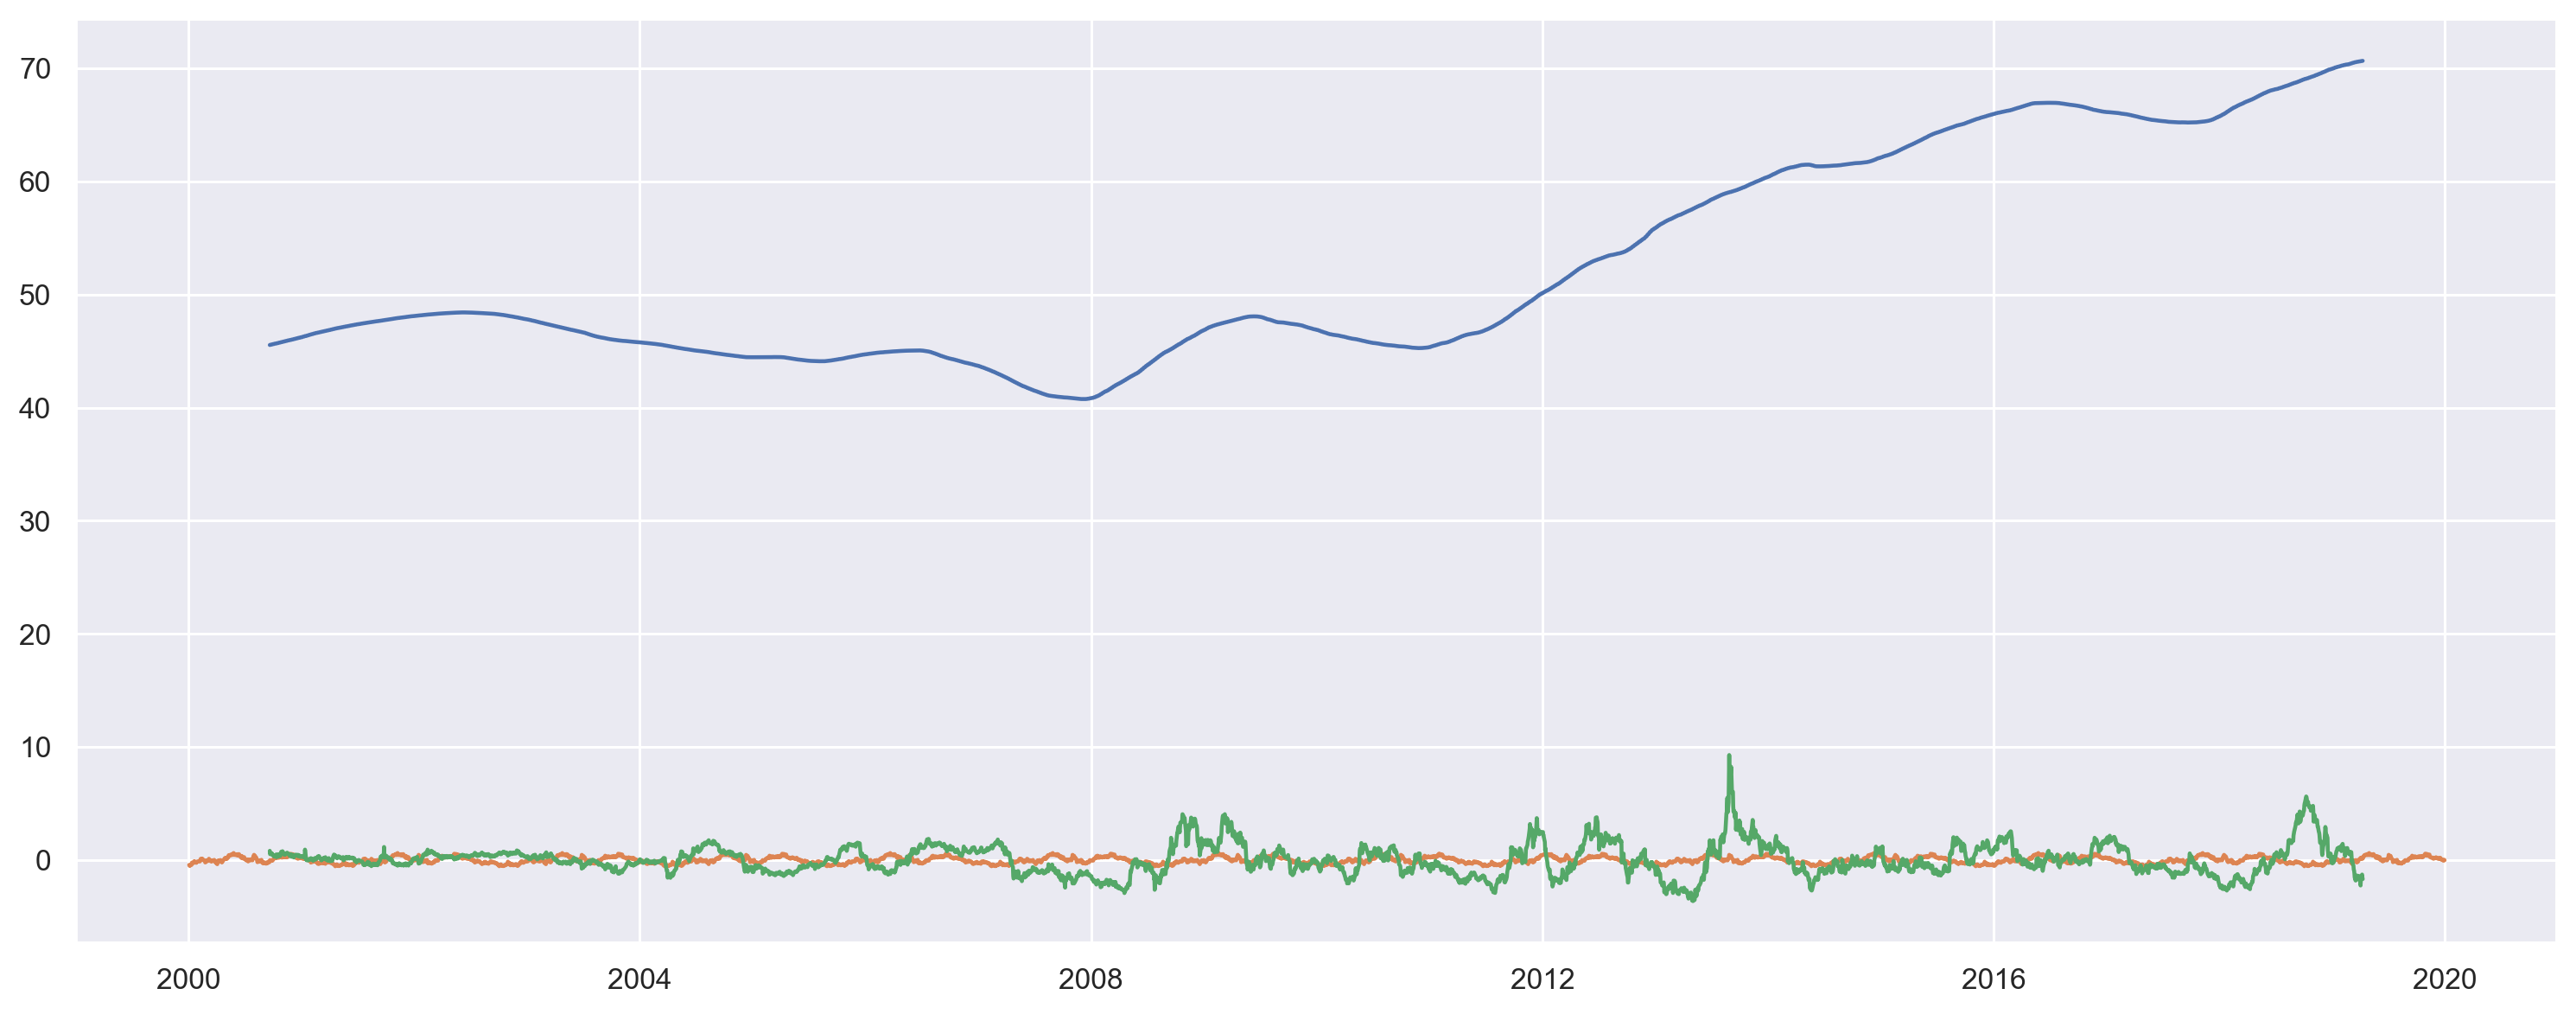

In [16]:
plt.plot(result.trend)
plt.plot(result.seasonal)
plt.plot(result.resid)

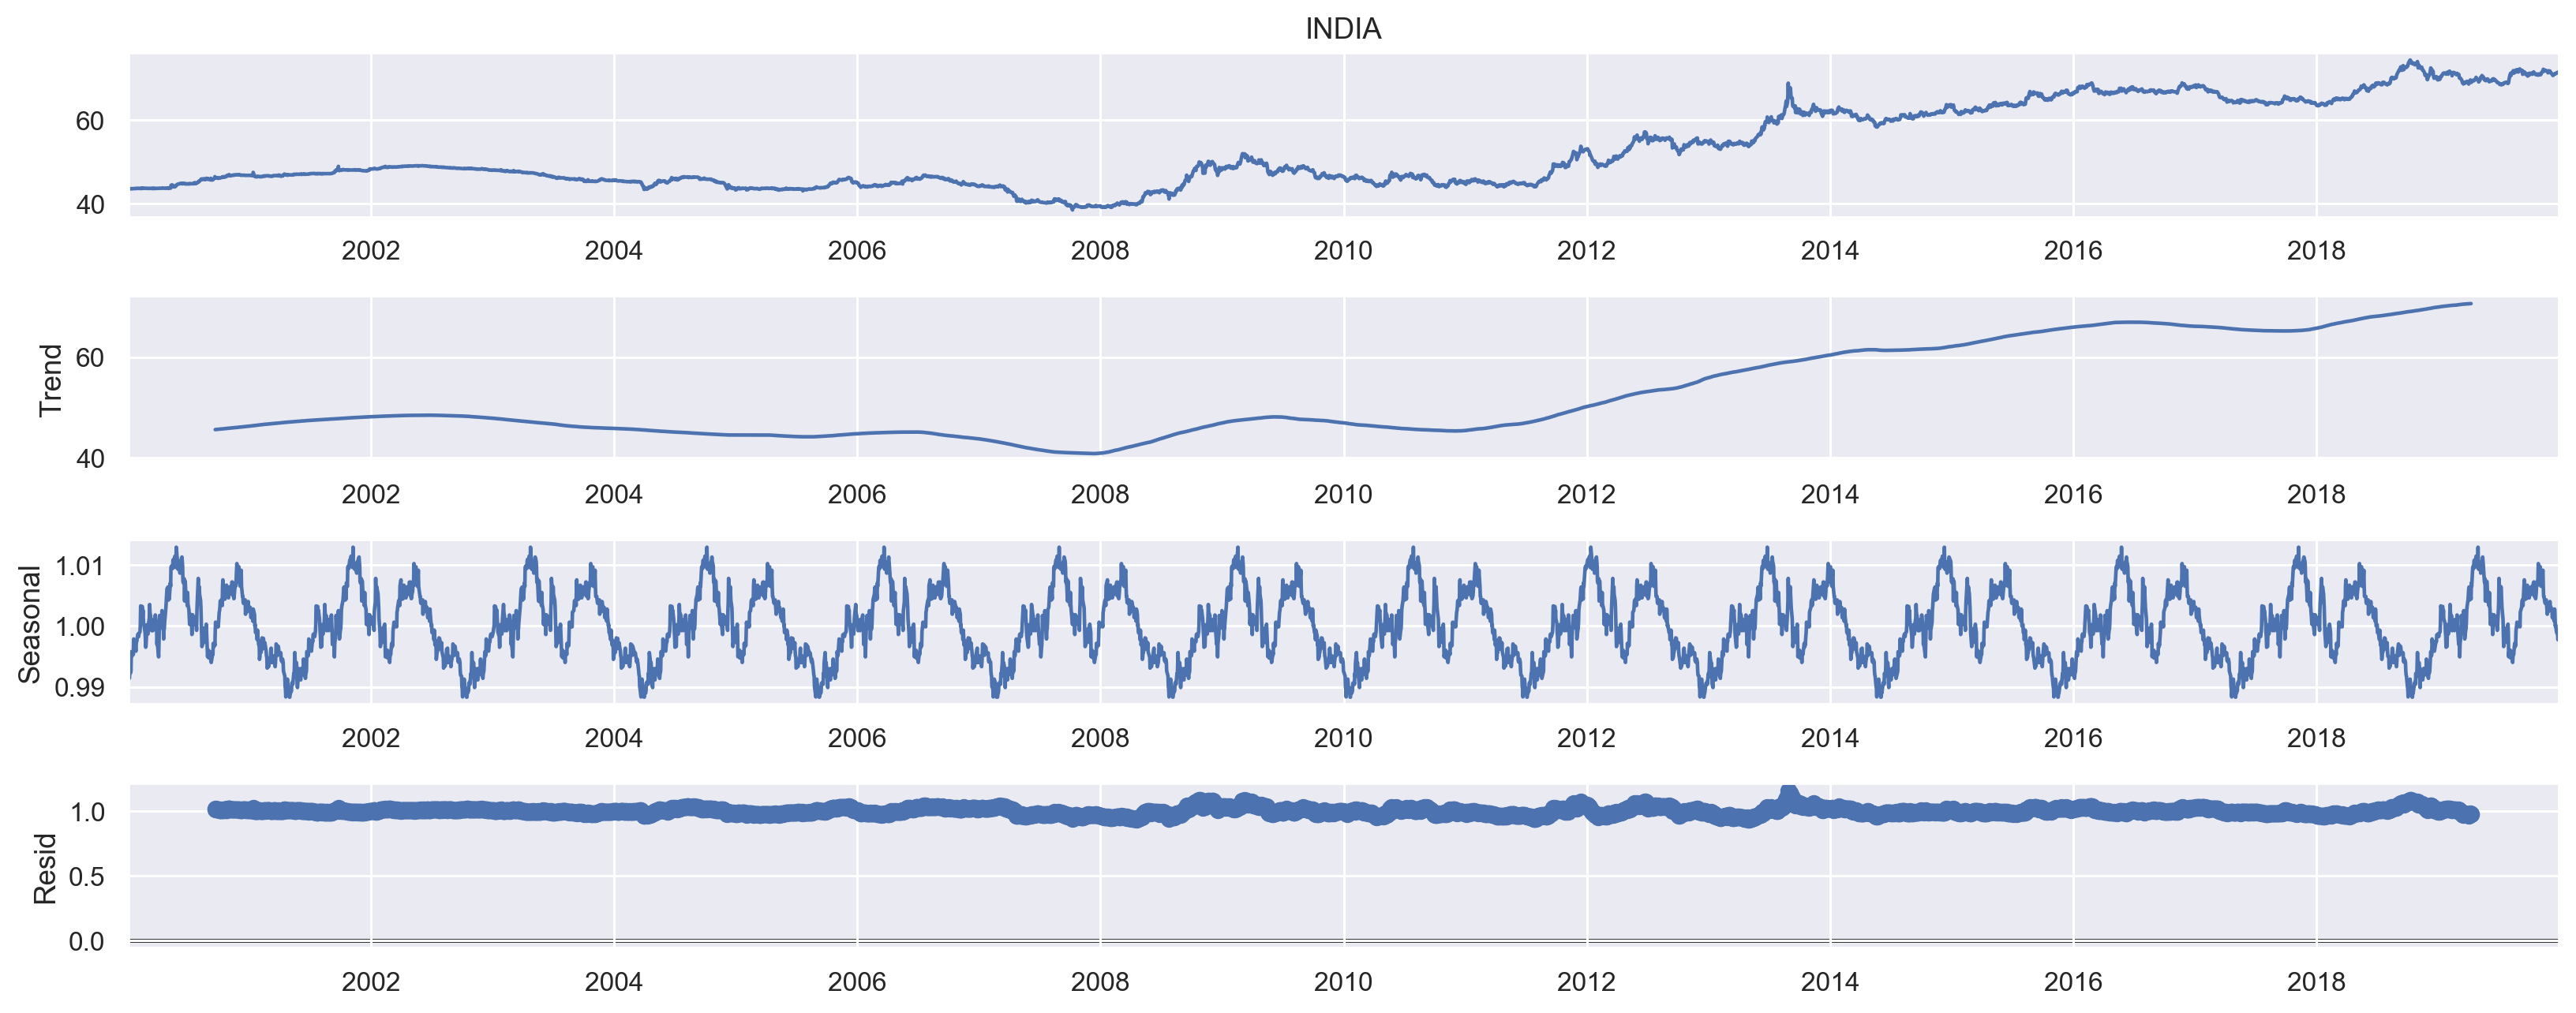

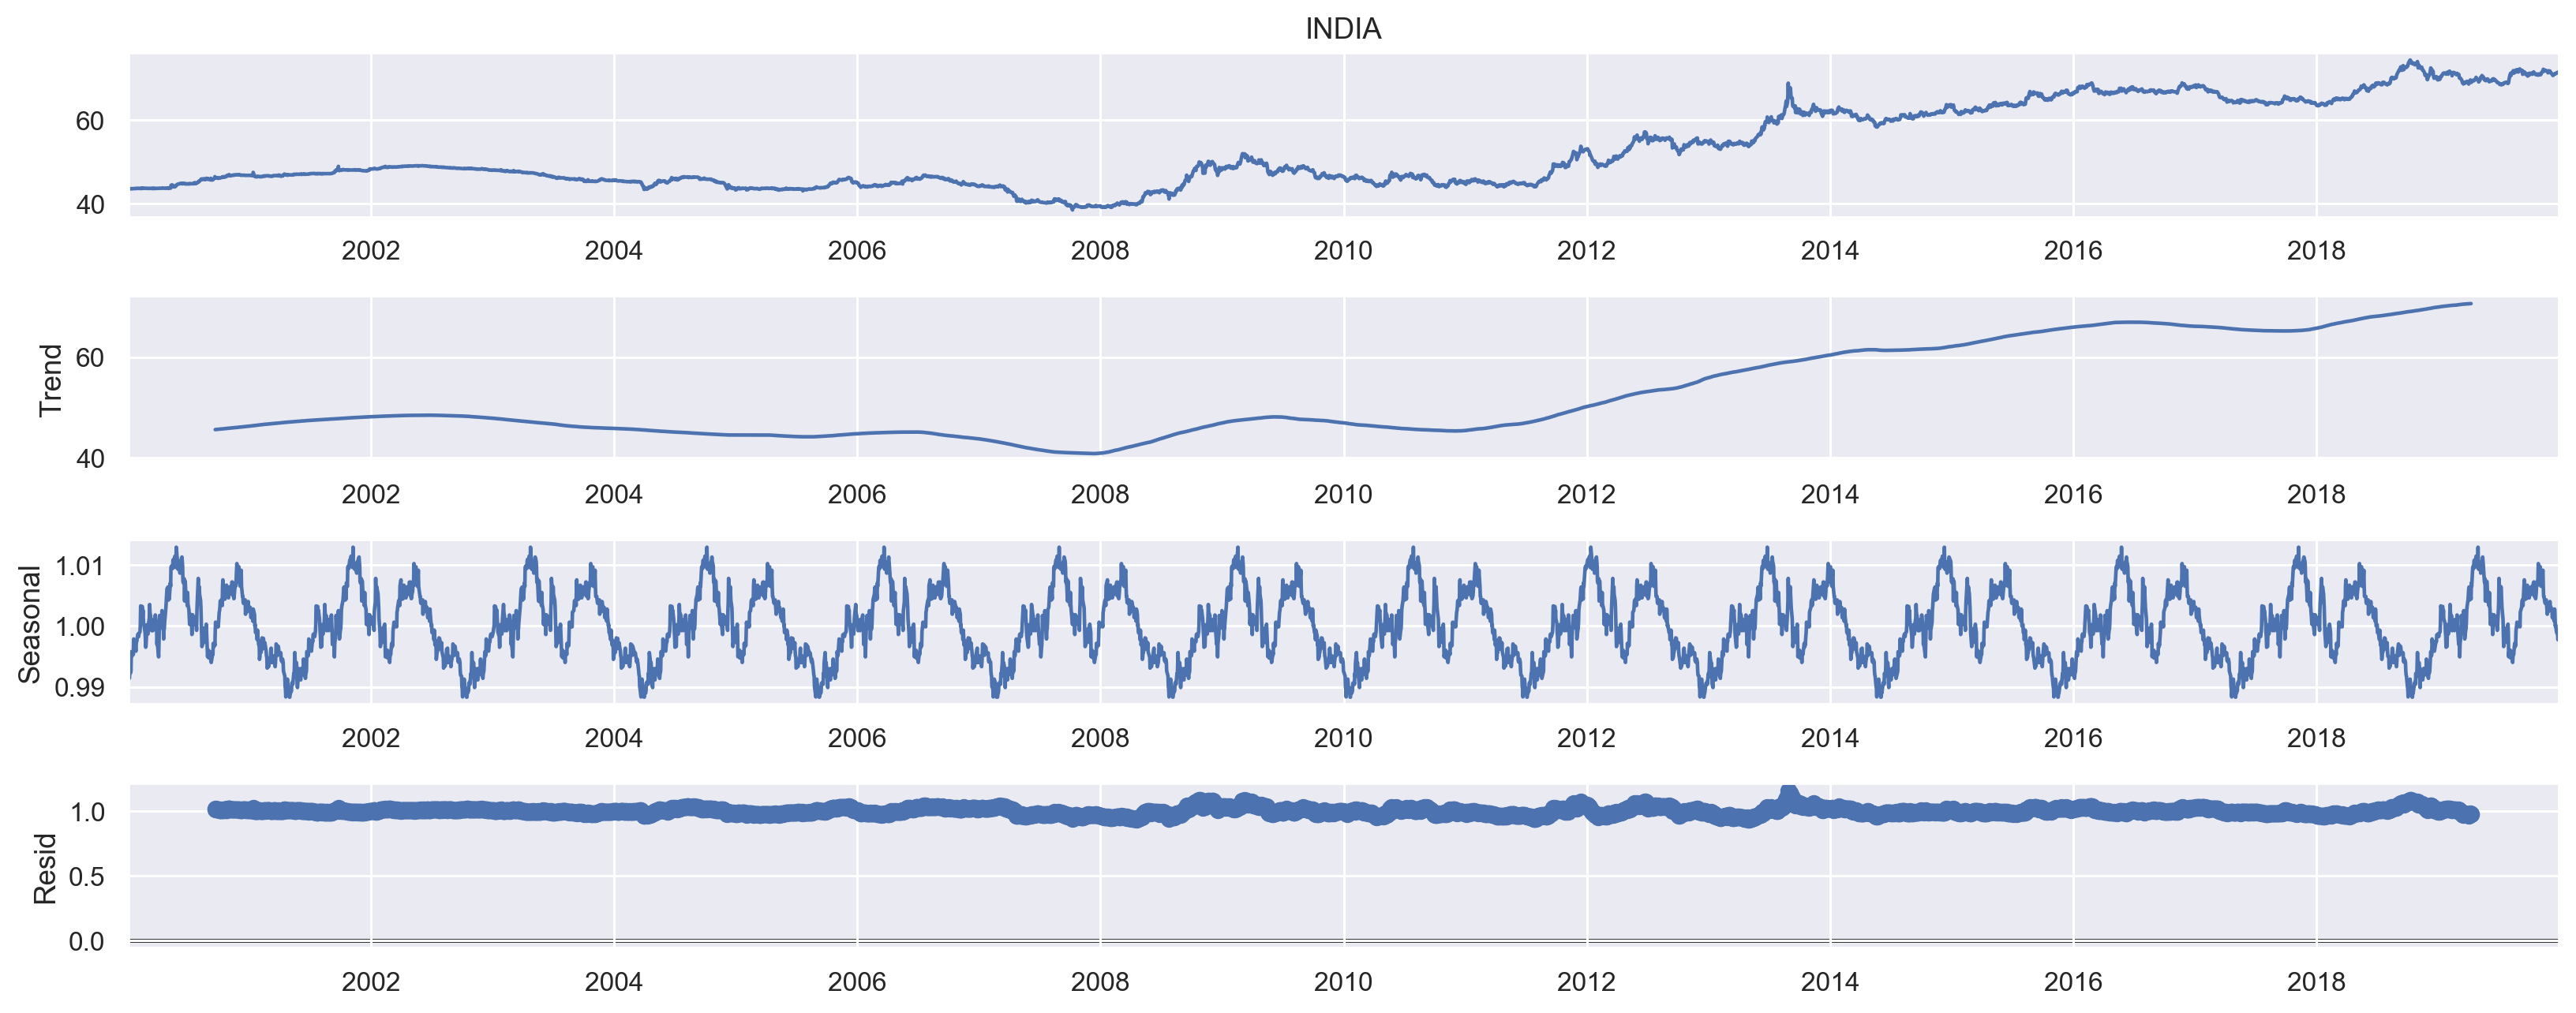

In [17]:
# Multiplicative

result = seasonal_decompose(dat['INDIA'], model = "mul", period = 365)
result.plot()

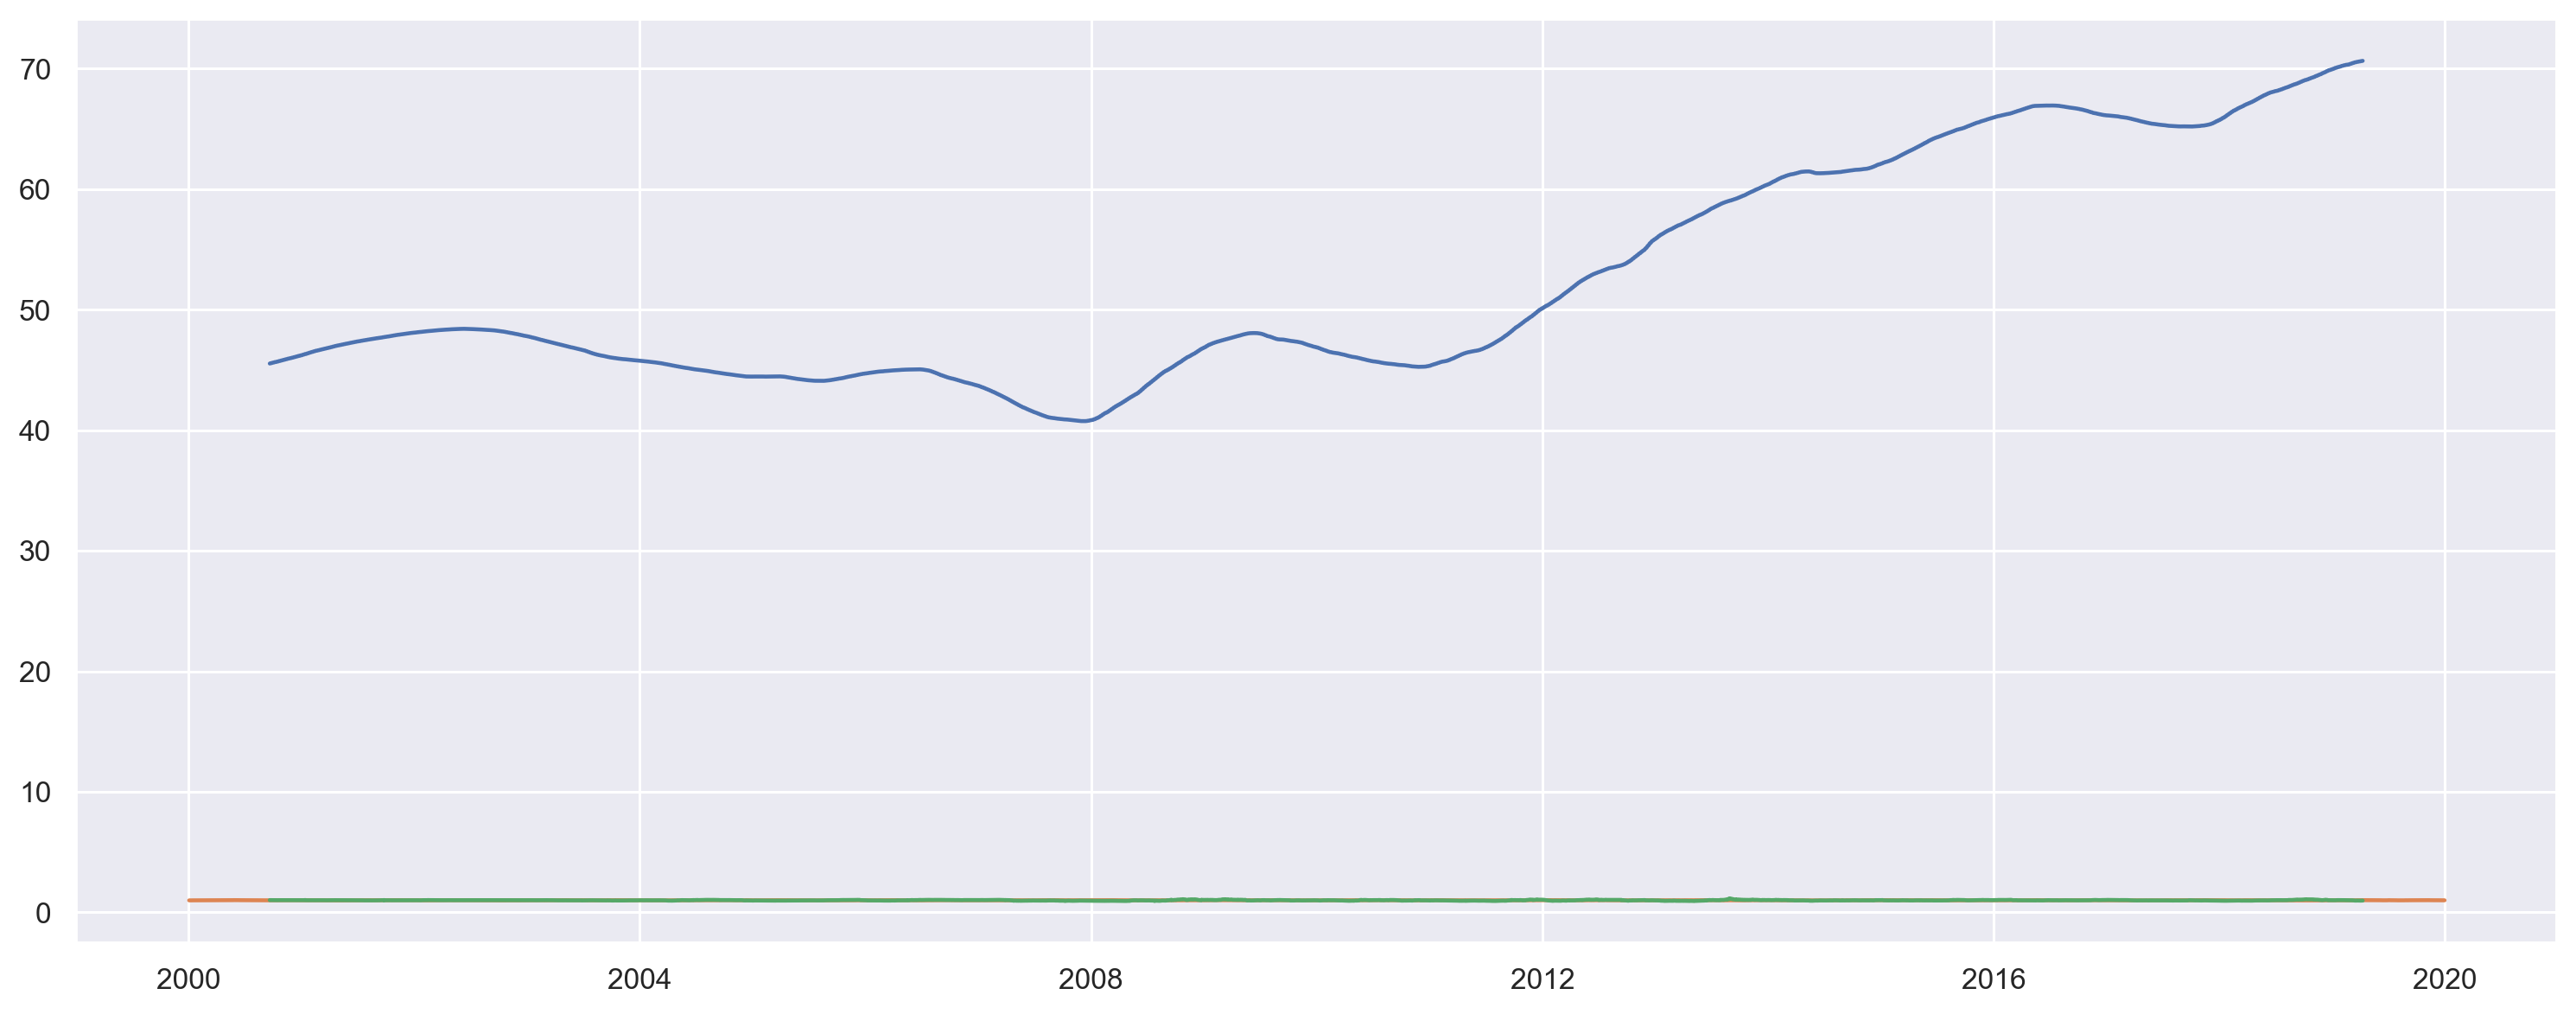

In [18]:
plt.plot(result.trend)
plt.plot(result.seasonal)
plt.plot(result.resid)

Text(0.5, 1.0, 'Distribution of Exchange rates_INDIA')

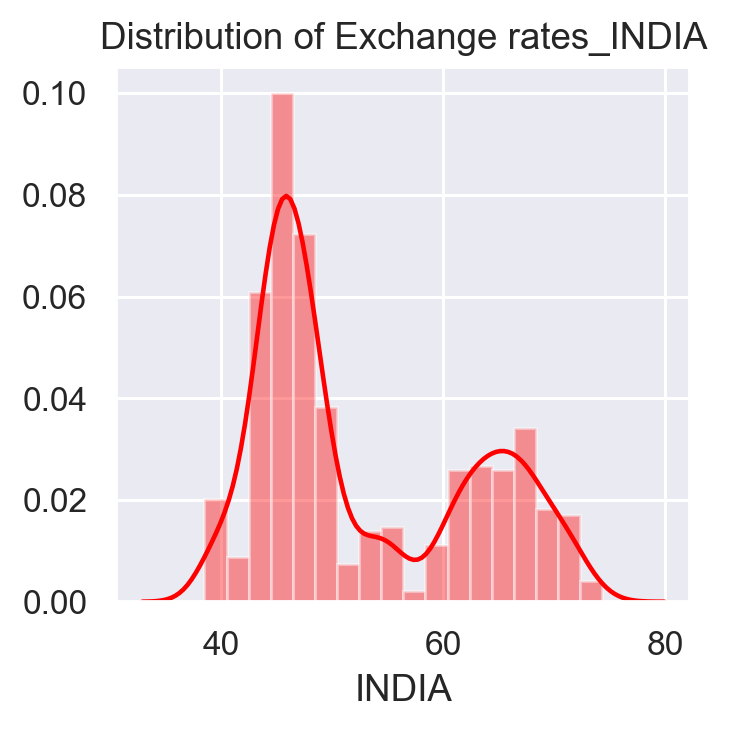

In [19]:
plt.figure(figsize=(3, 3)) 
g = sns.distplot(dat['INDIA'], norm_hist=False, color = 'red') 
g.set_title('Distribution of Exchange rates_INDIA') 

Text(0.5, 1.0, 'Density_fx_rates_INDIA')

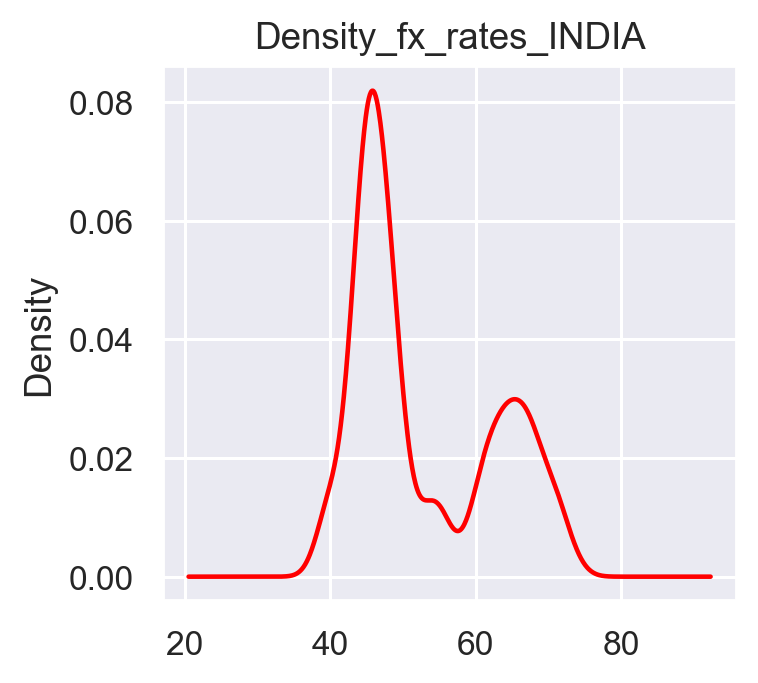

In [20]:
plt.figure(figsize=(3, 3)) 
dat['INDIA'].plot(kind = 'kde', color = 'red')
plt.title('Density_fx_rates_INDIA')

Text(0.5, 1.0, 'Frequency_Distribution_fx_rates_INDIA')

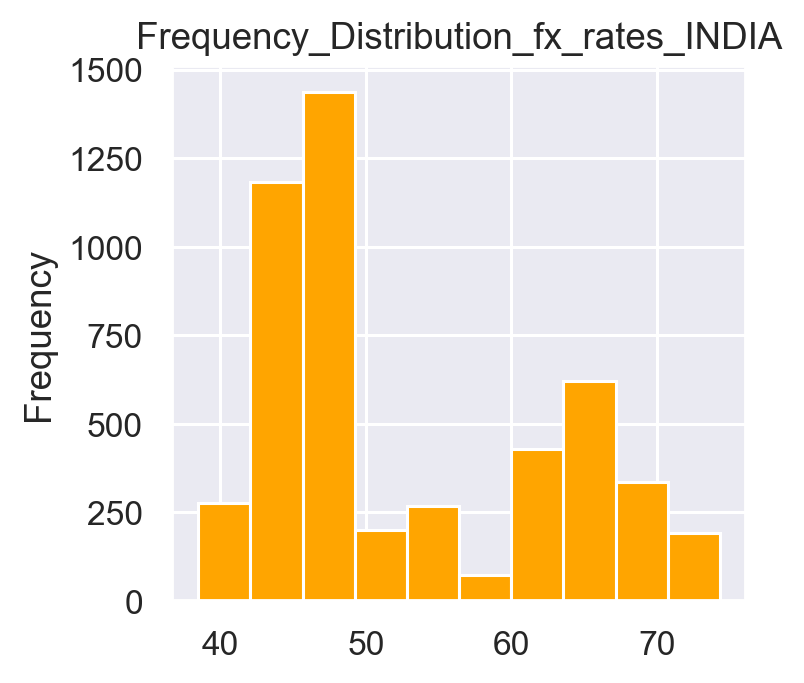

In [21]:
plt.figure(figsize=(3, 3)) 
dat['INDIA'].plot(kind = 'hist', color = 'Orange')
plt.title('Frequency_Distribution_fx_rates_INDIA')